# 🎯 Feature Engineering — Part A: Individual Concepts (Colab-Ready)

**Updated:** 2025-08-22

This notebook is designed for **first-time learners**. You will practice each feature engineering step **individually** (no pipelines yet), so you can clearly see *what each step does* and *why it matters*.

**What you'll practice:**
- Dataset loading & quick audit
- Handling missing values (drop, impute)
- Scaling & normalization (standardization, min-max, per-row normalization)
- Encoding categorical variables (ordinal vs one-hot)
- Feature transformations (log, power, polynomial)
- Simple dimensionality reduction (PCA) for visualization
- Short exercises after each section

> Use this Part A first. After you are comfortable, move to **Part B (Pipelines)** to automate and combine steps.

## 0) Setup

In [1]:
# If running in Google Colab, you can install optional packages here:
# !pip install -q statsmodels==0.14.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 100)

## 1) Dataset Setup & Quick Audit

In [2]:
# Option A: Load Titanic from a stable GitHub mirror (recommended for first run)
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# The Titanic dataset is already loaded in variable 'df'
print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Quick audit
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:")
df.describe().T


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 2) Handling Missing Values (Individually)

**Goal:** Learn when to **drop** vs **impute**.

**Common choices**
- Numeric: mean/median
- Categorical: most frequent

We'll practice on Titanic columns like `Age`, `Embarked`, and `Cabin`.

In [7]:
# View null counts
df.isna().sum().sort_values(ascending=False).head(10)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
dtype: int64

In [8]:
# 2.1 DROP example (use cautiously)
df_drop_rows = df.dropna(subset=['Age', 'Embarked'])  # drop rows where these are null
print("Original:", df.shape, "After drop:", df_drop_rows.shape)

Original: (891, 12) After drop: (712, 12)


In [9]:
# 2.2 SIMPLE IMPUTE example
df_imp = df.copy()
# Numeric (Age): median
df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())
# Categorical (Embarked): most frequent
df_imp['Embarked'] = df_imp['Embarked'].fillna(df_imp['Embarked'].mode()[0])

# 'Cabin' is very sparse; we can fill with "Unknown"
df_imp['Cabin'] = df_imp['Cabin'].fillna('Unknown')

df_imp.isna().sum().head(10)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [10]:
# 2.3 KNN Imputation (numeric only demonstration)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
knn_df = df[num_cols].copy()
imputer = KNNImputer(n_neighbors=3)
knn_imputed = imputer.fit_transform(knn_df)
knn_imputed_df = pd.DataFrame(knn_imputed, columns=num_cols)
knn_imputed_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


**📝 Exercise 2**
1) Compare **mean vs median** imputation for `Age`. Which preserves the original distribution better?  
2) For `Embarked`, try filling with a new category (`'Unknown'`) vs mode. What changes in `value_counts()`?

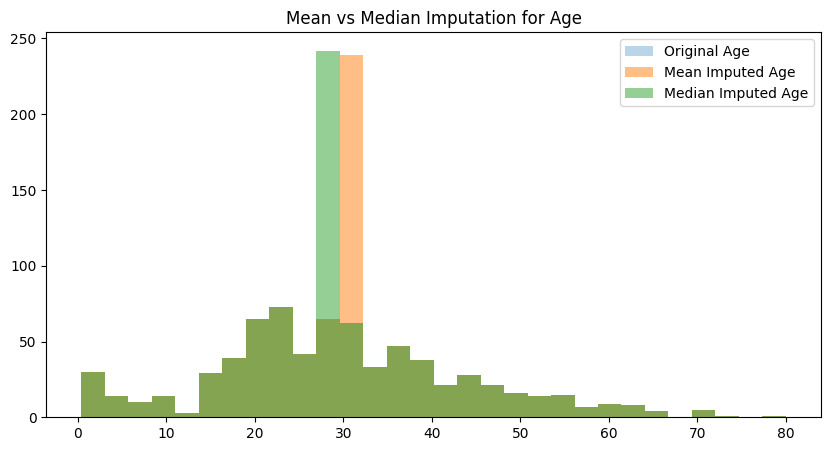

In [16]:

mean_df = df.copy()
median_df = df.copy()
mean_df['Age'] = mean_df['Age'].fillna(mean_df['Age'].mean())
median_df['Age'] = median_df['Age'].fillna(median_df['Age'].median())

plt.figure(figsize=(10,5))
plt.hist(df['Age'].dropna(), bins=30, alpha=0.3, label="Original Age")
plt.hist(mean_df['Age'], bins=30, alpha=0.5, label="Mean Imputed Age")
plt.hist(median_df['Age'], bins=30, alpha=0.5, label="Median Imputed Age")
plt.legend()
plt.title("Mean vs Median Imputation for Age")
plt.show()

In [17]:

mode_df = df.copy()
mode_df['Embarked'] = mode_df['Embarked'].fillna(mode_df['Embarked'].mode()[0])


unknown_df = df.copy()
unknown_df['Embarked'] = unknown_df['Embarked'].fillna('Unknown')


print("Original:\n", df['Embarked'].value_counts(dropna=False))
print("\nMode Imputation:\n", mode_df['Embarked'].value_counts())
print("\n'Unknown' Imputation:\n", unknown_df['Embarked'].value_counts())


Original:
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Mode Imputation:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

'Unknown' Imputation:
 Embarked
S          644
C          168
Q           77
Unknown      2
Name: count, dtype: int64


## 3) Scaling & Normalization (Individually)

- **Standardization**: z = (x - mean)/std (good for many ML models)
- **MinMax scaling**: maps to [0,1] (useful when features have different units)
- **Per-row Normalization**: scales each *row vector* to unit norm (useful for text-like frequency vectors)

We'll demonstrate on `Fare` and `Age`.

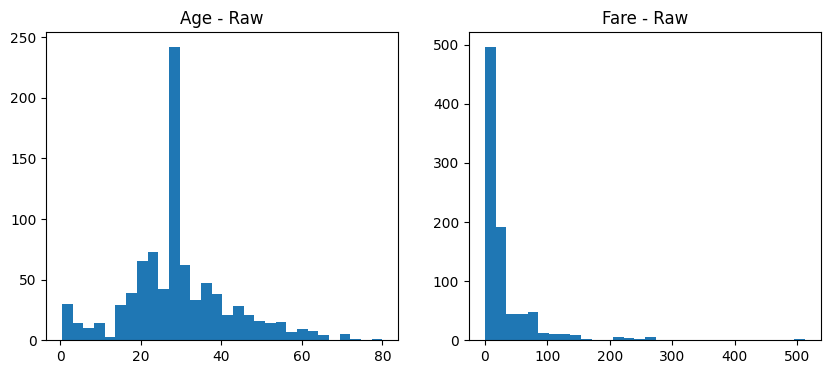

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df_imp['Age'].dropna(), bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(df_imp['Fare'].dropna(), bins=30)
axes[1].set_title('Fare - Raw')
plt.show()

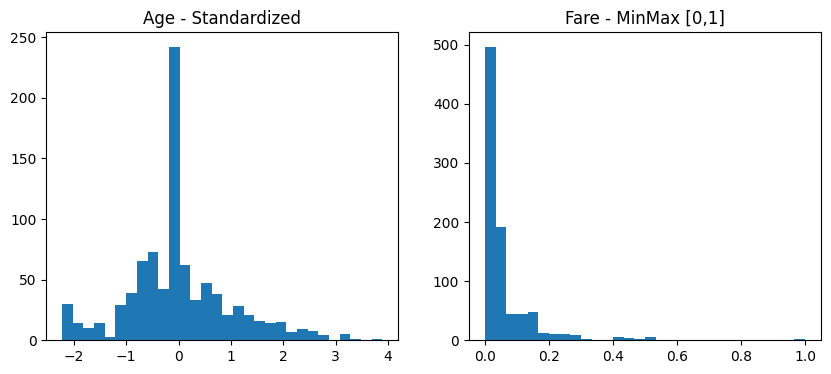

In [19]:
sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

age_std = sc_std.fit_transform(df_imp[['Age']])
fare_mm = sc_mm.fit_transform(df_imp[['Fare']])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(age_std.flatten(), bins=30)
axes[0].set_title('Age - Standardized')
axes[1].hist(fare_mm.flatten(), bins=30)
axes[1].set_title('Fare - MinMax [0,1]')
plt.show()

**📝 Exercise 3**
1) Standardize `Fare` and plot the histogram.  
2) Apply **Normalizer** on `[Age, Fare]` rows and check the first 5 normalized vectors.

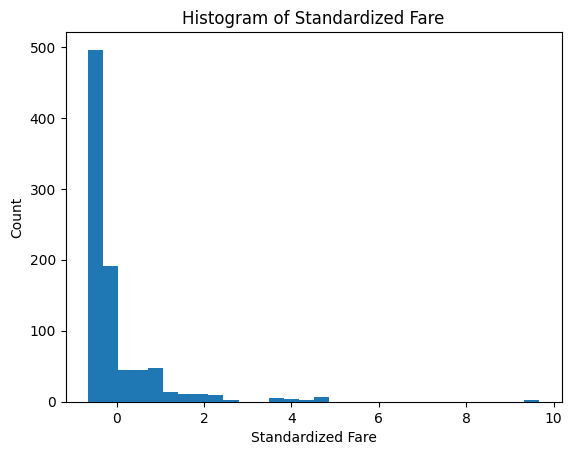

[[0.94975704 0.31298812]
 [0.47041706 0.88244422]
 [0.95655127 0.29156418]
 [0.55033828 0.83494178]
 [0.97455519 0.22414769]]


In [20]:
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt


scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])


plt.hist(df['Fare_scaled'], bins=30)
plt.xlabel("Standardized Fare")
plt.ylabel("Count")
plt.title("Histogram of Standardized Fare")
plt.show()


norm = Normalizer()
norm_values = norm.fit_transform(df[['Age', 'Fare']].dropna())

print(norm_values[:5])

## 4) Encoding Categorical Variables (Individually)

- **Ordinal/Label encoding**: map categories to integers (assumes order or used with tree models).  
- **One-Hot encoding**: binary column per category (no order assumption).

We'll use `Sex` and `Embarked` as examples.

In [21]:
# 4.1 Ordinal encoding demo (note: no real order in Sex/Embarked; this is just to illustrate)
enc = OrdinalEncoder()
ord_demo = df_imp[['Sex','Embarked']].copy()
ord_vals = enc.fit_transform(ord_demo)
pd.DataFrame(ord_vals, columns=['Sex_ord','Embarked_ord']).head()

,Sex_ord,Embarked_ord
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


In [22]:
# 4.2 One-Hot encoding demo with pandas
ohe_embarked = pd.get_dummies(df_imp['Embarked'], prefix='Embarked')
ohe_sex = pd.get_dummies(df_imp['Sex'], prefix='Sex')
encoded_df = pd.concat([df_imp[['Survived','Age','Fare']], ohe_sex, ohe_embarked], axis=1)
encoded_df.head()

,Survived,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,False,True,False,False,True
1,1,38.0,71.2833,True,False,True,False,False
2,1,26.0,7.9250,True,False,False,False,True
3,1,35.0,53.1000,True,False,False,False,True
4,0,35.0,8.0500,False,True,False,False,True


**📝 Exercise 4**
1) Compare the **number of features** produced by ordinal vs one-hot for `Embarked`.  
2) Why might one-hot be safer for linear models?

In [24]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

data = pd.DataFrame({
    'Embarked': ['C', 'Q', 'S', 'S', 'C', 'Q']
})

print("Original data:")
print(data)


ord_enc = OrdinalEncoder()
data['Embarked_ordinal'] = ord_enc.fit_transform(data[['Embarked']])
print("\nOrdinal Encoding:")
print(data[['Embarked', 'Embarked_ordinal']])
print("Number of features (ordinal):", 1)


ohe = OneHotEncoder(sparse_output=False)
onehot = ohe.fit_transform(data[['Embarked']])
onehot_df = pd.DataFrame(onehot, columns=ohe.get_feature_names_out(['Embarked']))
print("\nOne-Hot Encoding:")
print(onehot_df)
print("Number of features (one-hot):", onehot_df.shape[1])

Original data:
  Embarked
0        C
1        Q
2        S
3        S
4        C
5        Q

Ordinal Encoding:
  Embarked  Embarked_ordinal
0        C               0.0
1        Q               1.0
2        S               2.0
3        S               2.0
4        C               0.0
5        Q               1.0
Number of features (ordinal): 1

One-Hot Encoding:
   Embarked_C  Embarked_Q  Embarked_S
0         1.0         0.0         0.0
1         0.0         1.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         1.0         0.0         0.0
5         0.0         1.0         0.0
Number of features (one-hot): 3


## 5) Feature Transformation (Individually)

- **Log transform**: t = log1p(x) for right-skewed positive data (e.g., Fare).
- **Power transform**: Yeo-Johnson can handle zero/negative values; stabilizes variance.
- **Polynomial features**: create interactions/quadratics for simple non-linear modeling.

We'll use `Fare` and `Age`.

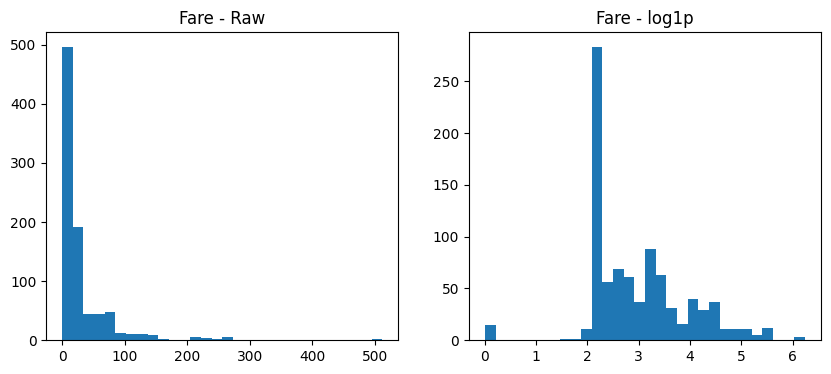

In [25]:
# 5.1 Log transform on Fare (positive values)
fare_raw = df_imp['Fare'].dropna().values.reshape(-1,1)
fare_log = np.log1p(fare_raw)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(fare_raw.flatten(), bins=30)
axes[0].set_title('Fare - Raw')
axes[1].hist(fare_log.flatten(), bins=30)
axes[1].set_title('Fare - log1p')
plt.show()

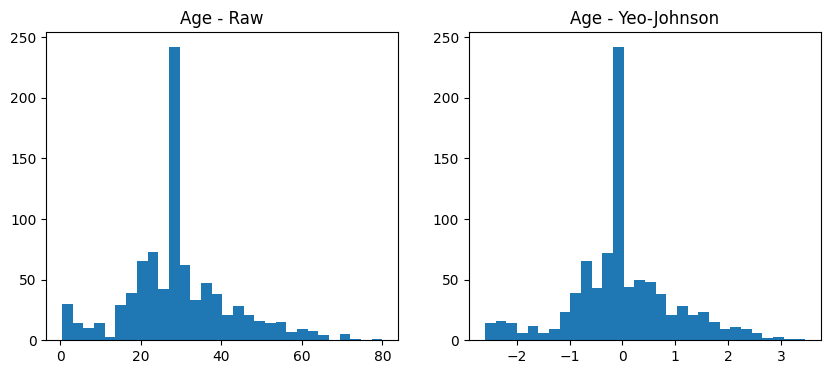

In [26]:
# 5.2 Power transform (Yeo-Johnson) on [Age, Fare]
pt = PowerTransformer(method='yeo-johnson')
af = df_imp[['Age','Fare']].dropna()
af_pt = pt.fit_transform(af)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(af['Age'].values, bins=30)
axes[0].set_title('Age - Raw')
axes[1].hist(af_pt[:,0], bins=30)
axes[1].set_title('Age - Yeo-Johnson')
plt.show()

In [27]:
# 5.3 Polynomial features on [Age, Fare] (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
af_poly = poly.fit_transform(af[['Age','Fare']])
print("Original shape:", af[['Age','Fare']].shape, " -> With poly:", af_poly.shape)
poly.get_feature_names_out(['Age','Fare'])[:6]

Original shape: (891, 2)  -> With poly: (891, 5)


array(['Age', 'Fare', 'Age^2', 'Age Fare', 'Fare^2'], dtype=object)

Skewness before transform:
Age     0.237708
Fare    1.396740
dtype: float64


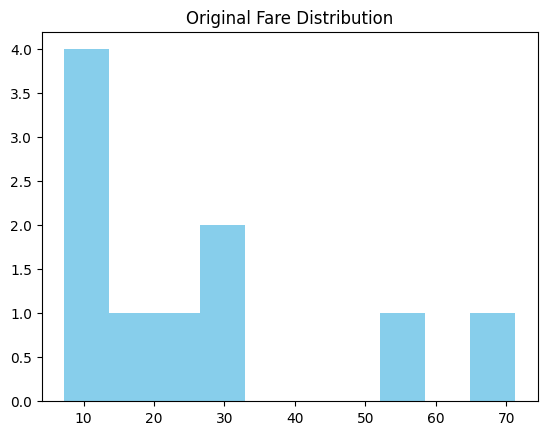

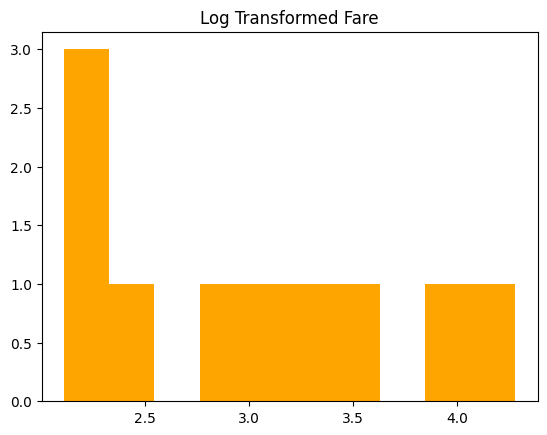

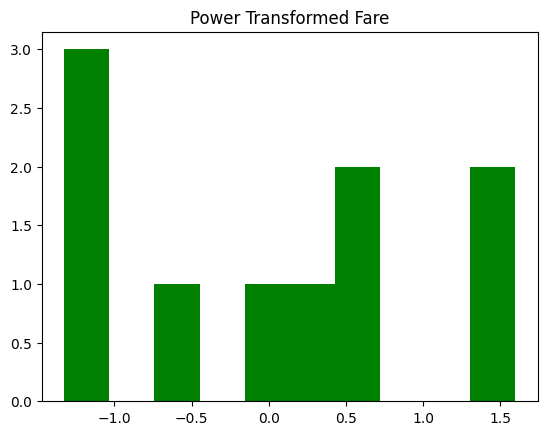


Skewness after log and power:
Log: 0.41147827703553663
Power: 0.12004454063376133

Polynomial Features (degree=2):
    Age   Fare   Age^2  Age Fare     Fare^2
0  22.0   7.25   484.0    159.50    52.5625
1  38.0  71.28  1444.0   2708.64  5080.8384
2  26.0   7.92   676.0    205.92    62.7264
3  35.0  53.10  1225.0   1858.50  2819.6100
4  54.0   8.05  2916.0    434.70    64.8025


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures


data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 54, 2, 27, 14, 4, 58],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 21.07, 11.13, 30.07, 16.70, 26.55]
})


print("Skewness before transform:")
print(data[['Age', 'Fare']].skew())


plt.hist(data['Fare'], bins=10, color='skyblue')
plt.title("Original Fare Distribution")
plt.show()


data['Fare_log'] = np.log1p(data['Fare'])

plt.hist(data['Fare_log'], bins=10, color='orange')
plt.title("Log Transformed Fare")
plt.show()


pt = PowerTransformer(method='yeo-johnson')
data['Fare_power'] = pt.fit_transform(data[['Fare']])

plt.hist(data['Fare_power'], bins=10, color='green')
plt.title("Power Transformed Fare")
plt.show()

print("\nSkewness after log and power:")
print("Log:", data['Fare_log'].skew())
print("Power:", data['Fare_power'].skew())


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['Age', 'Fare']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Fare']))

print("\nPolynomial Features (degree=2):")
print(poly_df.head())

**📝 Exercise 5**
1) Identify one numeric column that is **skewed**. Try both **log** and **power** transforms and compare histograms.  
2) With `PolynomialFeatures(2)`, which new terms are created from `Age` and `Fare`?

Skewness of numeric columns:
Age     0.389108
Fare    4.787317
dtype: float64


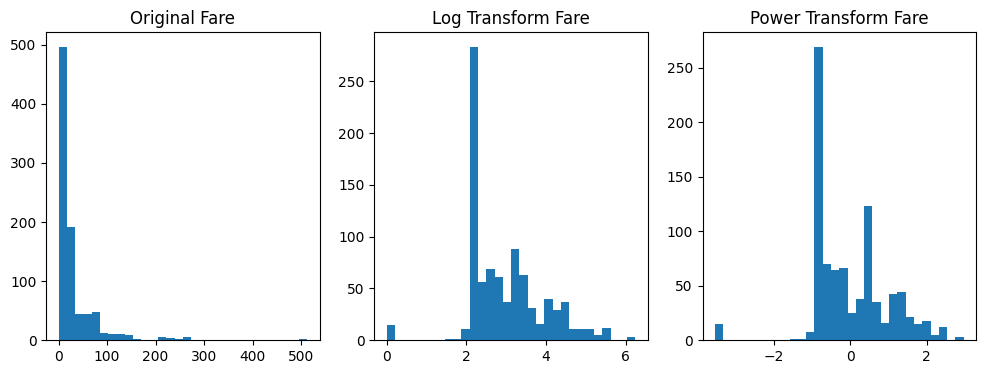

New Polynomial Features:
['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']
    Age     Fare   Age^2   Age Fare       Fare^2
0  22.0   7.2500   484.0   159.5000    52.562500
1  38.0  71.2833  1444.0  2708.7654  5081.308859
2  26.0   7.9250   676.0   206.0500    62.805625
3  35.0  53.1000  1225.0  1858.5000  2819.610000
4  35.0   8.0500  1225.0   281.7500    64.802500


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures


print("Skewness of numeric columns:")
print(df[['Age', 'Fare']].skew())


col = 'Fare'


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df[col].dropna(), bins=30)
plt.title(f"Original {col}")


plt.subplot(1,3,2)
plt.hist(np.log1p(df[col].dropna()), bins=30)
plt.title(f"Log Transform {col}")


pt = PowerTransformer(method='yeo-johnson')
fare_power = pt.fit_transform(df[[col]].dropna())

plt.subplot(1,3,3)
plt.hist(fare_power, bins=30)
plt.title(f"Power Transform {col}")

plt.show()


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age','Fare']].dropna())


feature_names = poly.get_feature_names_out(['Age','Fare'])
print("New Polynomial Features:")
print(feature_names)


print(pd.DataFrame(poly_features, columns=feature_names).head())

## 6) Simple Dimensionality Reduction (PCA) — Visualization Only

We will apply PCA to **numeric** features to reduce to 2D and make a scatter plot colored by `Survived` (if present).

> Note: This is for **intuition/visualization** only in Part A.

Explained variance ratios: [0.96165195 0.03587775]


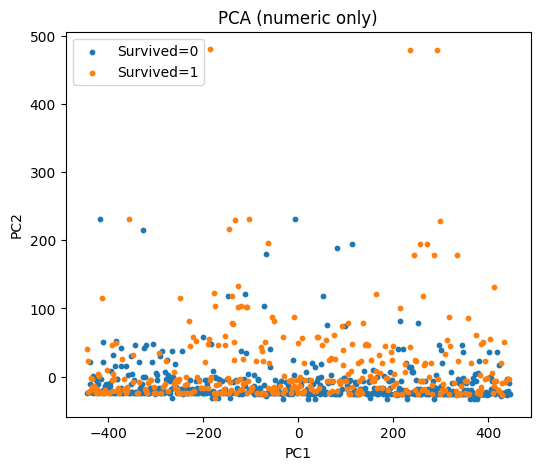

In [31]:
# Prepare a numeric-only frame (drop NA for simplicity here)
num_only = df_imp.select_dtypes(include=['number']).dropna()
y = df_imp.loc[num_only.index, 'Survived'] if 'Survived' in df_imp.columns else None

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(num_only.values)

print("Explained variance ratios:", pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(6,5))
if y is not None:
    # Color by Survived (0/1). Using a simple split to avoid specifying colors.
    idx0 = (y.values == 0)
    idx1 = (y.values == 1)
    plt.scatter(Z[idx0,0], Z[idx0,1], s=10, label='Survived=0')
    plt.scatter(Z[idx1,0], Z[idx1,1], s=10, label='Survived=1')
    plt.legend()
else:
    plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (numeric only)')
plt.show()

**📝 Exercise 6**
1) Which **two numeric columns** contribute the most variance before PCA (use `df.var()`)?  
2) Try PCA with `n_components=3` and print the cumulative explained variance.

In [32]:
import pandas as pd
from sklearn.decomposition import PCA

num_df = df.select_dtypes(include=['number'])


print("Variance of numeric columns:")
print(num_df.var().sort_values(ascending=False))


pca = PCA(n_components=3)
pca.fit(num_df.fillna(0))

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("\nCumulative Explained Variance:")
print(pca.explained_variance_ratio_.cumsum())

Variance of numeric columns:
PassengerId    66231.000000
Fare            2469.436846
Age              211.019125
Age_median       169.512498
Age_mean         169.052400
SibSp              1.216043
Fare_scaled        1.001124
Pclass             0.699015
Parch              0.649728
Survived           0.236772
dtype: float64

Explained Variance Ratio:
[0.95501    0.03577914 0.00804244]

Cumulative Explained Variance:
[0.95501    0.99078914 0.99883158]


## 7) Consolidated Practice (No Pipelines Yet)

Using the operations you've learned, perform a **clean preprocessing** (manually):
1) Impute: `Age` (median), `Embarked` (mode), `Cabin` ('Unknown').  
2) Scale: standardize `Age` and min-max scale `Fare`.  
3) Encode: one-hot `Sex` and `Embarked`.  
4) Transform: log1p `Fare`.  
5) (Optional) PCA on numeric subset for 2D visualization.

Then, answer:
- Which step **changed the data distribution** the most?
- Which encoding produced **more features**, ordinal or one-hot? Why?
- If you trained a simple logistic regression on your manually processed features, what **accuracy** do you get on a 75/25 split? (Optional challenge)

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np

# 1) Impute missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# 2) Scale
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

df['Age_std'] = scaler_std.fit_transform(df[['Age']])
df['Fare_mm'] = scaler_mm.fit_transform(df[['Fare']])

# 3) Encode categorical
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

# 4) Transform Fare (log1p to handle zeros)
df['Fare_log'] = np.log1p(df['Fare'])

# 5) Optional PCA on numeric subset (for 2D visualization)
numeric_subset = df.select_dtypes(include=['number']).dropna(axis=1)
pca2 = PCA(n_components=2)
proj = pca2.fit_transform(numeric_subset)

print("2D PCA projection shape:", proj.shape)


2D PCA projection shape: (891, 2)


C:\Users\VENKATA HEMANTH\AppData\Local\Temp\ipykernel_20232\395260546.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\VENKATA HEMANTH\AppData\Local\Temp\ipykernel_20232\395260546.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

## ✅ What You Should Take Away from Part A

- Each step (imputation, scaling, encoding, transforms) has a **clear purpose** and **visible effect**.  
- You can now apply them **manually** and reason about their impact.  
- Next: move to **Part B (Pipelines)** to **combine & automate** these steps safely (avoid leakage, enable cross-validation, and reproducibility).

In [34]:

if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')
